## Redes Neurais para o GBPUSD

- Passo 1 - Carregar as bibliotecas
- Passo 2 - Carregar a base de dados
- Passo 3 - Tratamento dos dados
- Passo 4 - Construçao dos alvos e variaveis
- Passo 5 - Preparaçao da base para treinamento e teste
- Passo 6 - Treinamento do modelo
- Passo 7 - Avaliaçao dos Resultados
- Passo 8 - MLOps

 

________________________________________________________

## Passo 1 - Carregando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [3]:
# Para remover os warnings

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## Passo 2 - Carregando a base de dados

In [4]:
# Carregando a base de dados e fazendo os checks iniciais

# Mudando o diretório de trabalho
import os
os.chdir("E:\\Base de dados")

df1 = pd.read_csv("GBPUSD1.csv", sep = ",")

In [5]:
df1.head()

,1993.05.12,00:00,1.53700,1.54450,1.52900,1.53380,2781
0,1993.05.13,00:00,1.5328,1.5360,1.5180,1.5225,2571
1,1993.05.14,00:00,1.5228,1.5415,1.5200,1.5387,2711
2,1993.05.17,00:00,1.5365,1.5460,1.5309,1.5355,2921
3,1993.05.18,00:00,1.5350,1.5380,1.5237,1.5365,2711
4,1993.05.19,00:00,1.5350,1.5482,1.5328,1.5432,2261


In [6]:
# Ajustando a data e renomeando colunas


df1 = df1.rename(columns={"1993.05.12": "data", "00:00" : "hora", "1.53700": "open", "1.54450" : "high", "1.52900" : "low", "1.53380" : "close", "2781" : "volume"})

df1["data"] = pd.to_datetime(df1["data"]).dt.normalize()

df1 = df1.set_index("data")

df1.drop(["hora", "volume"], axis = 1)

,open,high,low,close
data,,,,
1993-05-13,1.53280,1.53600,1.51800,1.52250
1993-05-14,1.52280,1.54150,1.52000,1.53870
1993-05-17,1.53650,1.54600,1.53090,1.53550
1993-05-18,1.53500,1.53800,1.52370,1.53650
1993-05-19,1.53500,1.54820,1.53280,1.54320
...,...,...,...,...
2022-04-01,1.31329,1.31510,1.30860,1.31140
2022-04-04,1.30926,1.31367,1.30926,1.31151
2022-04-05,1.31130,1.31665,1.30664,1.30719


In [7]:
df1.drop(["hora", "volume"], axis = 1)

,open,high,low,close
data,,,,
1993-05-13,1.53280,1.53600,1.51800,1.52250
1993-05-14,1.52280,1.54150,1.52000,1.53870
1993-05-17,1.53650,1.54600,1.53090,1.53550
1993-05-18,1.53500,1.53800,1.52370,1.53650
1993-05-19,1.53500,1.54820,1.53280,1.54320
...,...,...,...,...
2022-04-01,1.31329,1.31510,1.30860,1.31140
2022-04-04,1.30926,1.31367,1.30926,1.31151
2022-04-05,1.31130,1.31665,1.30664,1.30719


In [8]:
df1.head()

,hora,open,high,low,close,volume
data,,,,,,
1993-05-13,00:00,1.5328,1.5360,1.5180,1.5225,2571
1993-05-14,00:00,1.5228,1.5415,1.5200,1.5387,2711
1993-05-17,00:00,1.5365,1.5460,1.5309,1.5355,2921
1993-05-18,00:00,1.5350,1.5380,1.5237,1.5365,2711
1993-05-19,00:00,1.5350,1.5482,1.5328,1.5432,2261


In [9]:
df1.describe()

,open,high,low,close,volume
count,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000
mean,1.566980,1.573692,1.560305,1.567149,41829.085269
std,0.189011,0.189434,0.188425,0.188992,45756.469295
min,1.146520,1.171350,1.140980,1.146530,78.000000
25%,1.442900,1.448950,1.435550,1.442850,7583.000000
50%,1.565500,1.572100,1.559900,1.566000,13571.000000
75%,1.647325,1.655020,1.639800,1.647480,71365.500000
max,2.106800,2.116100,2.098300,2.106500,358974.000000


---------------

## Passo 4 - Construção dos alvos e variaveis

In [10]:
# Leg de x periodos

periodos = 10

# Lag positivo de x periodos
df1["Lag_P2"] = df1["close"].shift(periodos)


In [11]:
# Dummy para saber se o dia atual é de alta(1) ou baixa(0)

df1["High_Low"] = np.where(df1["close"] > df1["Lag_P2"], 1, 0)

df1.tail()

,hora,open,high,low,close,volume,Lag_P2,High_Low
data,,,,,,,,
2022-04-01,00:00,1.31329,1.31510,1.30860,1.31140,75766,1.31762,0
2022-04-04,00:00,1.30926,1.31367,1.30926,1.31151,56600,1.31683,0
2022-04-05,00:00,1.31130,1.31665,1.30664,1.30719,63570,1.32618,0
2022-04-06,00:00,1.30780,1.31078,1.30447,1.30706,88132,1.32032,0
2022-04-07,00:00,1.30696,1.31061,1.30513,1.30665,49651,1.31863,0


In [12]:
df1.describe()

,open,high,low,close,volume,Lag_P2,High_Low
count,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7437.000000,7447.000000
mean,1.566980,1.573692,1.560305,1.567149,41829.085269,1.567494,0.511615
std,0.189011,0.189434,0.188425,0.188992,45756.469295,0.188884,0.499899
min,1.146520,1.171350,1.140980,1.146530,78.000000,1.146530,0.000000
25%,1.442900,1.448950,1.435550,1.442850,7583.000000,1.443150,0.000000
50%,1.565500,1.572100,1.559900,1.566000,13571.000000,1.566100,1.000000
75%,1.647325,1.655020,1.639800,1.647480,71365.500000,1.647680,1.000000
max,2.106800,2.116100,2.098300,2.106500,358974.000000,2.106500,1.000000


In [13]:
# Alvo 1 - Retorno
df1["Retorno"] = df1["close"].pct_change(periodos)
df1["Alvo1"] = df1["Retorno"].shift(-periodos)

# Variação em pontos do Alvo
df1["Pontos"] = (df1["close"] - df1["close"].shift(1))
df1["Pontos"] = df1["Retorno"].shift(-periodos)


In [14]:
df1["Pontos"].describe()*2

count    14874.000000
mean        -0.000130
std          0.034747
min         -0.264483
25%         -0.020631
50%          0.000990
75%          0.021585
max          0.161740
Name: Pontos, dtype: float64

In [15]:
df1.head()

,hora,open,high,low,close,volume,Lag_P2,High_Low,Retorno,Alvo1,Pontos
data,,,,,,,,,,,
1993-05-13,00:00,1.5328,1.5360,1.5180,1.5225,2571,NaN,0,NaN,0.025944,0.025944
1993-05-14,00:00,1.5228,1.5415,1.5200,1.5387,2711,NaN,0,NaN,0.014298,0.014298
1993-05-17,00:00,1.5365,1.5460,1.5309,1.5355,2921,NaN,0,NaN,0.016607,0.016607
1993-05-18,00:00,1.5350,1.5380,1.5237,1.5365,2711,NaN,0,NaN,0.012366,0.012366
1993-05-19,00:00,1.5350,1.5482,1.5328,1.5432,2261,NaN,0,NaN,-0.002074,-0.002074


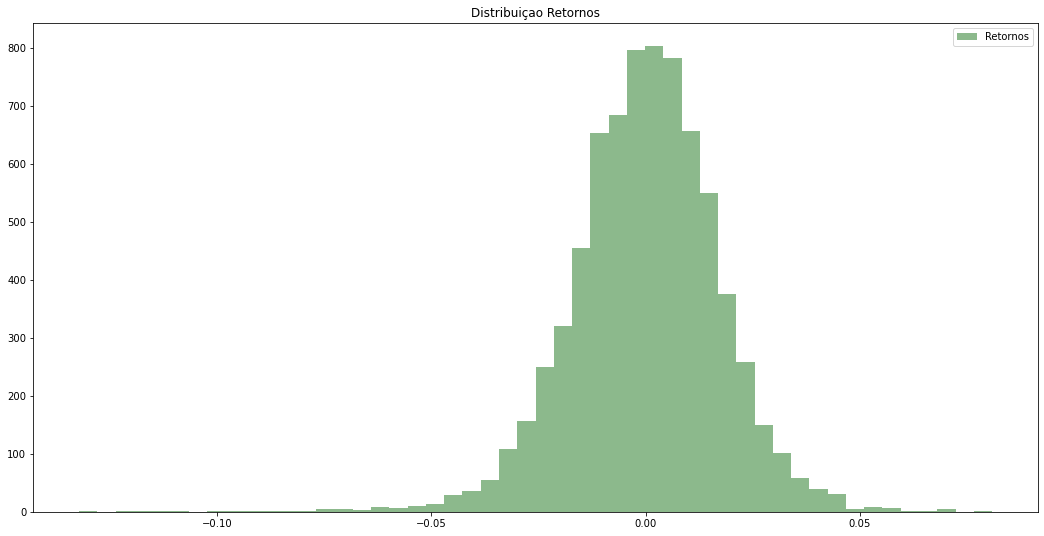

In [16]:
plt.figure(figsize = (18,9))
plt.hist(df1["Retorno"], bins = 50
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkgreen"
        , edgecolor = "none"
        , label = "Retornos");

plt.legend()
plt.title("Distribuiçao Retornos");

In [17]:
# Criação do alvo
df1["Alvo_Bin"] = np.where(df1['Alvo1'] > df1["Retorno"].describe()[6]/2, 1
                            , np.where(df1['Alvo1'] < df1["Retorno"].describe()[4]/2, -1, 0))

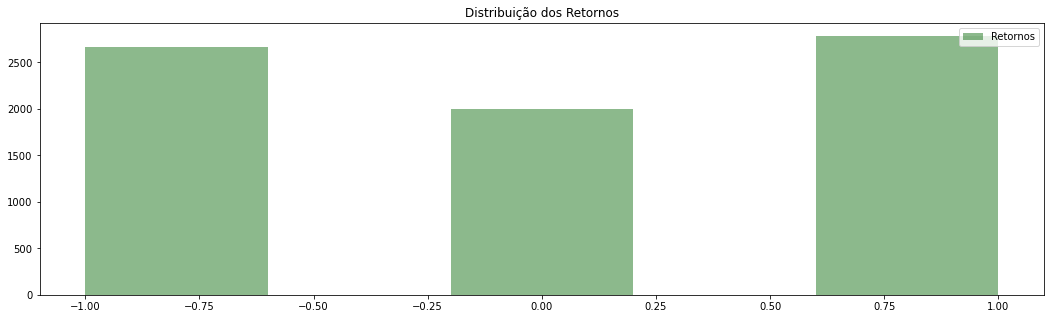

In [18]:
plt.figure(figsize= (18, 5))
plt.hist(df1["Alvo_Bin"], bins = 5
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "darkgreen"
        , edgecolor = "none"
        , label = "Retornos");

plt.legend()
plt.title("Distribuição dos Retornos");


In [19]:
# Construção de variaveis

# Desvio Padrão de 5 dias
df1["std5"] = df1["Retorno"].rolling(5).std()

# Desvio Padrão de 10 dias
df1["std10"] = df1["Retorno"].rolling(10).std()

# Desvio padrão de 15 dias
df1["std15"] = df1["Retorno"].rolling(15).std()

# Proporção dp corpo do candle em relação ao range do dia
df1["prop"] = (df1["close"]- df1["open"])/(df1["high"] - df1["low"])

# Direção do dia atual
df1["dir_D"] = np.where(df1["close"] > df1["open"] , "1", "0")

# Direção D-1
df1["dir_D-1"] = df1["dir_D"].shift(1)

# Direção D-2
df1["dir_D-2"] = df1["dir_D"].shift(2)

# Direção D_3
df1["dir_D-3"] = df1["dir_D"].shift(3)

# Média Móvel de 5 dias std5
df1["mm_std5"] = df1["std5"].rolling(5).mean()

# Média Móvel de 10 dias std10
df1["mm_std10"] = df1["std10"].rolling(10).mean()

# Média Móveç de 15 dias std15
df1["mm_std15"] = df1["std15"].rolling(15).mean()

# RSL std5
df1["RSL_std5"] = (df1["std5"]/df1["std5"].rolling(5).mean())-1

# RSL std10
df1["RSL_std10"] = (df1["std10"]/df1["std10"].rolling(10).mean())-1

# RSL std15
df1["RSL_std15"] = (df1["std15"]/df1["std15"].rolling(15).mean())-1

# Fisica 
p = 10

# Velocidade de p dias
df1["v"] = (df1["Retorno"] - df1["Retorno"].shift(p))/p

# Aceleração de p dias
df1["a"] = (df1["v"] - df1["v"].shift(p))/p

# Força
# Calculando a massa
df1["m"] = df1["Retorno"].rolling(p).sum()
df1["f"] = df1["m"]*df1["a"]

# Energia Cinética
df1["T"] = 0.5*df1["m"]*df1["v"]*df1["v"]

# Trabalho
# Cateto Oposto
cat_op =df1["Retorno"].rolling(p).sum()-df1["Retorno"].rolling(1).sum()
cat_ad = p
df1["cat"] = cat_op/cat_ad
df1 = df1.dropna(axis = 0)
df1["w"] = df1["f"]*np.cos(np.arctan(df1["cat"]))

# Energia Potencial
df1["k"] = cat_op*df1["m"]

# Torque
df1["tau"] = df1["f"]*np.sin(np.arctan(df1["cat"]))

# Momentum
df1["M"] = df1["m"]*df1["v"]

# Gravidade
df1["g"] = df1["m"]*df1["Retorno"].rolling(p).sum()/(df1["m"]/df1["Retorno"].rolling(p).sum())*(df1["m"]/df1["Retorno"].rolling(p).sum())

# Para o zig zag dos retornos
df1["Retorno1"] =df1["Retorno"].shift(1)
df1["Retorno2"] = df1["Retorno"].shift(2)

df1["Zigzag_alta"] = np.where(((df1["Retorno"] >0) & (df1["Retorno1"] < 0) & (df1["Retorno2"] > 0)), 1, 0)
df1["Zigzag_baixa"] = np.where(((df1["Retorno"] < 0) & (df1["Retorno1"] > 0) & (df1["Retorno2"] < 0)), -1, 0)
df1["Zigzag"] = df1["Zigzag_alta"] + df1["Zigzag_baixa"]

# Resistencia - R=V/I onde V é a amplitude maxima dos ultimos retornos
# Novo periodo

df1["V_Max"] = df1["Retorno"].rolling(p).max()
df1["V_Min"] = df1["Retorno"].rolling(p).min()
df1["I"] = df1["Retorno"].rolling(p).sum()


In [20]:
import ta

# Variaveis de Indicadores técnicos - Biblioteca TA

# Inicializa o indicador
indicator_atr14 = ta.volatility.AverageTrueRange(high = df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14)

indicator_bb = ta.volatility.bollinger_wband(close = df1["close"], window = 20, window_dev = 2)
indicator_rsi14 = ta.momentum.RSIIndicator(close = df1["close"], window = 14)
indicator_rsi2 = ta.momentum.RSIIndicator(close = df1["close"], window = 2)
indicator_stoc = ta.momentum.StochasticOscillator(high= df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14, smooth_window = 3)
indicator_adx = ta.trend.ADXIndicator(high = df1["high"], low= df1["low"], close = df1["close"], window= 14)
indicator_ichimoko = ta.trend.IchimokuIndicator(high= df1["high"], low = df1["low"], window1 = 9, window2 = 26, window3= 52)
indicator_macd  =ta.trend.MACD(close= df1["close"], window_slow = 26, window_fast = 12, window_sign = 9)
indicator_ema = ta.trend.EMAIndicator(close = df1["close"], window= 9)
# Variavel abertura das bandas
df1["abertura_bb"] = indicator_bb
df1["RSI14"] = indicator_rsi14.rsi()
df1["RSI2"] = indicator_rsi2.rsi()
df1["STOC"] = indicator_stoc.stoch()
df1["ATR14"] = indicator_atr14.average_true_range()
df1["ADX"] = indicator_adx.adx()
df1["EMA"] = indicator_ema.ema_indicator()
df1["ICK"] = indicator_ichimoko.ichimoku_a()
df1["MACD"] = indicator_macd.macd()

In [21]:
# Filtrando os valores missing

df1_filtrado = df1.dropna(axis = 0) 

df1_filtrado = df1_filtrado.drop(["mm_std5", "mm_std10", "mm_std15", "Retorno1"
                                  , "Retorno2", "Zigzag_alta", "Zigzag_baixa"
                                 ], axis = 1)

df2 = df1_filtrado.copy()

In [22]:
corte = 5

In [23]:
df1_filtrado["RSL_std5"] = pd.qcut(df1_filtrado["RSL_std5"], corte, labels = False)
df1_filtrado["RSL_std10"] = pd.qcut(df1_filtrado["RSL_std10"], corte, labels = False)
df1_filtrado["RSL_std15"] = pd.qcut(df1_filtrado["RSL_std15"], corte, labels = False)
df1_filtrado["v"] = pd.qcut(df1_filtrado["v"], corte, labels = False)
df1_filtrado["a"] = pd.qcut(df1_filtrado["a"], corte, labels = False)
df1_filtrado["m"] = pd.qcut(df1_filtrado["m"], corte, labels = False)
df1_filtrado["f"] = pd.qcut(df1_filtrado["f"], corte, labels = False)
df1_filtrado["T"] = pd.qcut(df1_filtrado["T"], corte, labels = False)
df1_filtrado["w"] = pd.qcut(df1_filtrado["w"], corte, labels = False)
df1_filtrado["k"] = pd.qcut(df1_filtrado["k"], corte, labels = False)
df1_filtrado["tau"] = pd.qcut(df1_filtrado["tau"], corte, labels = False)
df1_filtrado["M"] = pd.qcut(df1_filtrado["M"], corte, labels = False)
df1_filtrado["g"] = pd.qcut(df1_filtrado["g"], corte, labels = False)
#df1_filtrado["Zigzag"] = pd.qcut(df1_filtrado["Zigzag"], corte,labels = False)
df1_filtrado["V_Max"] = pd.cut(df1_filtrado["V_Max"], corte, labels = False)
df1_filtrado["V_Min"] = pd.cut(df1_filtrado["V_Min"], corte, labels = False)
df1_filtrado["I"] = pd.cut(df1_filtrado["I"], corte, labels = False)

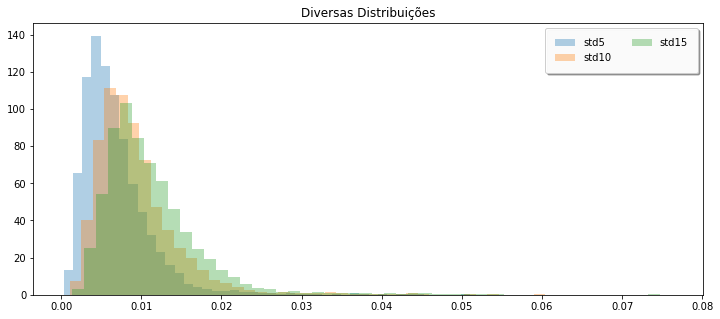

In [24]:
plt.figure(figsize = (12,5))
config = dict(histtype = 'stepfilled', alpha = 0.35, density = True, bins = 50)

plt.hist(df1["std5"], **config, label = "std5")
plt.hist(df1["std10"], **config, label = "std10")
plt.hist(df1["std15"], **config, label = "std15")

# Formatando a legenda
plt.legend(loc = "upper right"
            , frameon = True
            , ncol = 2
            , fancybox = True
            , framealpha = 0.95
            , shadow = True
            , borderpad = 1)

plt.title("Diversas Distribuições");

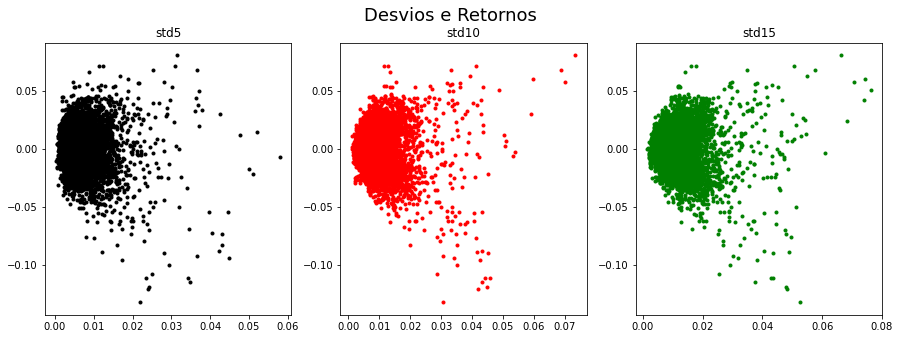

In [25]:
fig, axs = plt.subplots(1,3,figsize = (15, 5));
fig.suptitle("Desvios e Retornos", fontsize = 18);
axs[0].set_title('std5')
axs[1].set_title('std10')
axs[2].set_title('std15')
axs[0].plot(df1["std5"], df1["Retorno"], ".", color = "black", label = "aleatório")
axs[1].plot(df1["std10"], df1["Retorno"], ".", color = "red", label = "aleatorio")
axs[2].plot(df1["std15"], df1["Retorno"], ".", color = "green", label = "aleatorio");

In [26]:
pd.crosstab(pd.qcut(df1["a"], 10, labels = False), df1["Alvo_Bin"])/df1.shape[0]*100

Alvo_Bin,-1,0,1
a,,,
0,3.527504,2.730099,3.743749
1,3.568050,2.540884,3.892418
2,3.446412,2.513853,4.041087
3,3.365320,2.878767,3.757264
4,3.392350,2.689553,3.919449
5,3.581565,2.635491,3.770780
6,3.662657,2.513853,3.824841
7,3.635626,2.811191,3.554534
8,3.757264,2.797675,3.446412


---------------

### Passo 5 - Preparação da base p/ treinamento e teste

In [27]:
df1_filtrado.tail()

,hora,open,high,low,close,volume,Lag_P2,High_Low,Retorno,Alvo1,...,I,abertura_bb,RSI14,RSI2,STOC,ATR14,ADX,EMA,ICK,MACD
data,,,,,,,,,,,,,,,,,,,,,
2022-03-18,00:00,1.31475,1.31966,1.31106,1.31762,87547,1.32232,0,-0.003554,-0.004721,...,2,5.530094,42.635032,91.599186,40.306356,0.010230,36.172213,1.314322,1.321325,-0.010434
2022-03-21,00:00,1.31704,1.32097,1.31263,1.31683,80579,1.31013,1,0.005114,-0.004040,...,2,5.035135,42.144606,74.099276,40.335329,0.010095,35.001164,1.314823,1.321325,-0.009645
2022-03-22,00:00,1.31693,1.32733,1.31197,1.32618,91282,1.30967,1,0.012606,-0.014319,...,2,4.456279,49.542406,95.309788,62.730539,0.010471,32.925964,1.317095,1.322887,-0.008171
2022-03-23,00:00,1.32630,1.32984,1.31744,1.32032,74872,1.31777,1,0.001935,-0.010043,...,2,3.866867,45.606404,47.031927,57.592068,0.010609,30.645008,1.317740,1.323515,-0.007391
2022-03-24,00:00,1.32037,1.32144,1.31566,1.31863,91545,1.30864,1,0.007634,-0.009085,...,2,3.698161,44.508178,36.397745,62.445561,0.010264,28.770896,1.317918,1.323515,-0.006830


In [28]:
# Separando os dados entre treinamento e teste

# Vamos treinar o modelo de 1993 a 2006
start_train = "1993-07-29"
end_train = "2006-12-31"

# Vamos testar o modelo de 2006 a 2022
start_test = "2007-01-01"
end_test = "2022-04-05"

df1_train1 = df1_filtrado.loc[start_train : end_train]

df1_test1 = df1_filtrado.loc[start_test : end_test]

In [29]:
df1_filtrado.columns[12:48]

Index(['std5', 'std10', 'std15', 'prop', 'dir_D', 'dir_D-1', 'dir_D-2',
       'dir_D-3', 'RSL_std5', 'RSL_std10', 'RSL_std15', 'v', 'a', 'm', 'f',
       'T', 'cat', 'w', 'k', 'tau', 'M', 'g', 'Zigzag', 'V_Max', 'V_Min', 'I',
       'abertura_bb', 'RSI14', 'RSI2', 'STOC', 'ATR14', 'ADX', 'EMA', 'ICK',
       'MACD'],
      dtype='object')

In [30]:
# Separando os dados com as variaveis em x e o alvo em y
 
x_train1 = df1_train1.iloc[:, 12:47]
y_train1 = df1_train1['Alvo_Bin'].values.reshape(-1, 1)

x_test1 = df1_test1.iloc[:, 12:47]
y_test1 = df1_test1['Alvo_Bin'].values.reshape(-1, 1)

----------

### Passo 6 - Treinamento do modelo



In [31]:
gbpusd = MLPClassifier(hidden_layer_sizes = (100,500,100), max_iter = 500,
                    solver = "sgd", verbose = 10, tol = 1e-8, random_state = 42,
                    learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh")

gbpusd.fit(x_train1, y_train1)

Iteration 1, loss = 1.25059275
Iteration 2, loss = 1.17018684
Iteration 3, loss = 1.13760402
Iteration 4, loss = 1.12686159
Iteration 5, loss = 1.12099853
Iteration 6, loss = 1.11612215
Iteration 7, loss = 1.11212975
Iteration 8, loss = 1.10878138
Iteration 9, loss = 1.10602800
Iteration 10, loss = 1.10378956
Iteration 11, loss = 1.10141080
Iteration 12, loss = 1.09992730
Iteration 13, loss = 1.09817141
Iteration 14, loss = 1.09663536
Iteration 15, loss = 1.09559361
Iteration 16, loss = 1.09446909
Iteration 17, loss = 1.09338538
Iteration 18, loss = 1.09241832
Iteration 19, loss = 1.09162032
Iteration 20, loss = 1.09081782
Iteration 21, loss = 1.09012986
Iteration 22, loss = 1.08935135
Iteration 23, loss = 1.08873856
Iteration 24, loss = 1.08813451
Iteration 25, loss = 1.08769676
Iteration 26, loss = 1.08712104
Iteration 27, loss = 1.08691826
Iteration 28, loss = 1.08634782
Iteration 29, loss = 1.08598445
Iteration 30, loss = 1.08559958
Iteration 31, loss = 1.08520276
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 500, 100),
              learning_rate='adaptive', learning_rate_init=5e-05, max_iter=500,
              random_state=42, solver='sgd', tol=1e-08, verbose=10)

In [32]:
# Predições para o treinamento e teste

y_pred_train1 = gbpusd.predict(x_train1)
y_pred_test1 = gbpusd.predict(x_test1)

----------

### Passo 7 - Avaliação dos Resultados

In [33]:
# Treinamento

print(confusion_matrix(y_train1, y_pred_train1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train1, y_pred_train1))

[[549  39 558]
 [332  85 537]
 [417  47 857]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

          -1       0.42      0.48      0.45      1146
           0       0.50      0.09      0.15       954
           1       0.44      0.65      0.52      1321

    accuracy                           0.44      3421
   macro avg       0.45      0.41      0.37      3421
weighted avg       0.45      0.44      0.39      3421



In [34]:
# Teste

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[548  80 859]
 [348  54 619]
 [486  88 871]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

          -1       0.40      0.37      0.38      1487
           0       0.24      0.05      0.09      1021
           1       0.37      0.60      0.46      1445

    accuracy                           0.37      3953
   macro avg       0.34      0.34      0.31      3953
weighted avg       0.35      0.37      0.33      3953



In [35]:
# Calculando a performance - para toda a base

y_pred_all = gbpusd.predict(df1_filtrado.iloc[:, 12:47])

In [36]:
df1_filtrado.loc[: , "Previsto"] = y_pred_all
df1_filtrado.loc[: , "Retorno_Modelo"] = df1_filtrado.loc[: , "Previsto"]*df1_filtrado["Alvo1"]

#Simulando um stop de 2%

stop = 0.0
df1_filtrado.loc[: , "Retorno_Modelo"] = np.where(df1_filtrado.loc[: , 'Retorno_Modelo'] < -stop
                                               , -stop, df1_filtrado.loc[: , 'Retorno_Modelo'])

df1_filtrado.loc[: , "Retorno_Modelo_Acumulado"] = df1_filtrado["Retorno_Modelo"].cumsum()

In [37]:
df1_filtrado.loc[: , "Retorno_Modelo_Acumulado"].tail()

data
2022-03-18    49.637362
2022-03-21    49.637362
2022-03-22    49.637362
2022-03-23    49.647405
2022-03-24    49.656491
Name: Retorno_Modelo_Acumulado, dtype: float64

In [38]:
# Para fazer um conditional plot

df1_filtrado.index.name = "Date"
df1_filtrado.reset_index(inplace = True)

df1_filtrado["Date"] = pd.to_datetime(df1_filtrado["Date"])

df1_filtrado["train_test"] = np.where(df1_filtrado["Date"] > end_train, 1, -1)

In [39]:
base_agregada = df1_filtrado.resample("M", on = "Date").sum()

base_agregada.loc[: , "Retorno_Modelo_Acumulado"] = base_agregada["Retorno_Modelo"].cumsum()*100

""


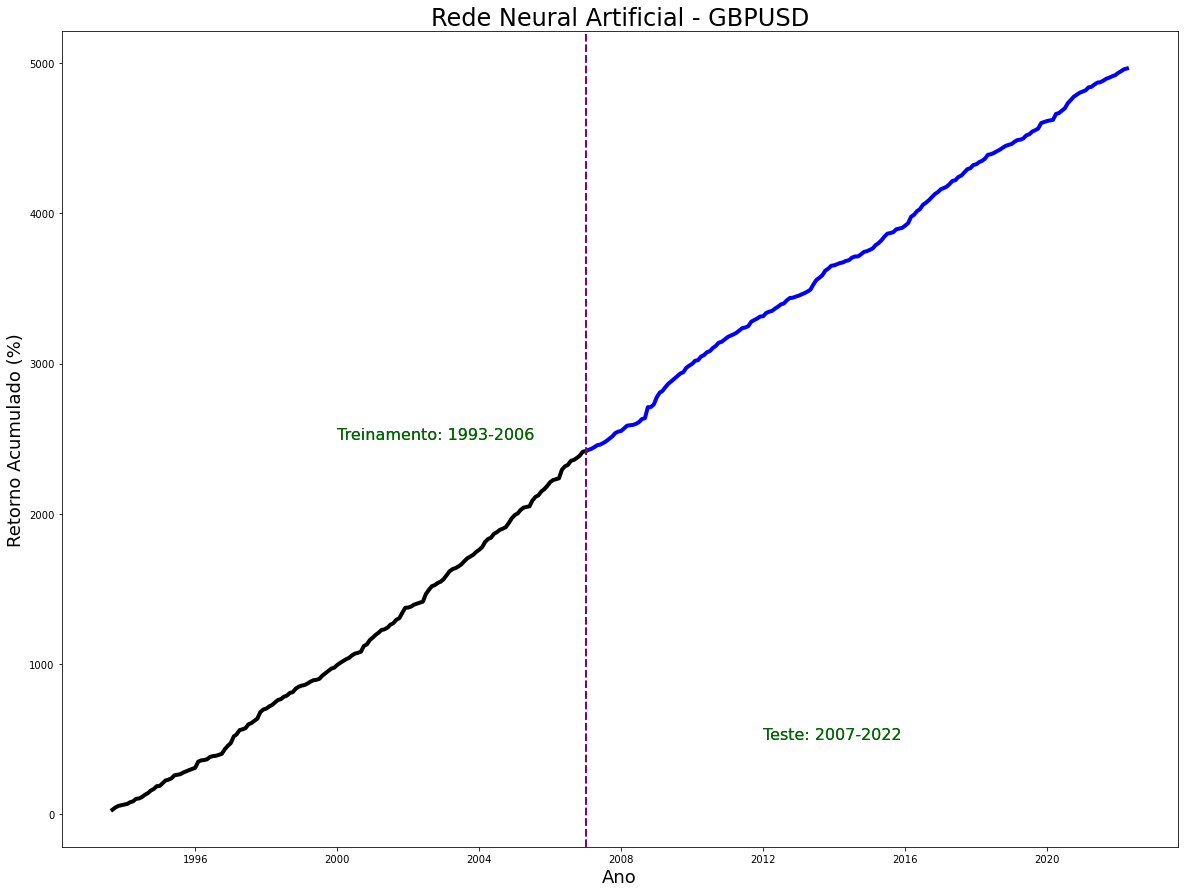

In [40]:
import datetime

# Plota o grafico
fig, ax = plt.subplots(figsize = (20,15))

def grafico(group):
    color = "black" if (group["train_test"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.Retorno_Modelo_Acumulado, c=color, linewidth=lw)
    plt.xlabel("Ano"
           , fontsize = 18);
    plt.ylabel("Retorno Acumulado (%)"
           , fontsize = 18);
    plt.title("Rede Neural Artificial - GBPUSD", fontsize = 24)
    plt.axvline( x = datetime.datetime.strptime(end_train,'%Y-%m-%d'), color='purple', linestyle = "--", lw = 2)
    setup = dict(size = 16, color = "darkgreen")
    setup2 = dict(size = 14, color = "black")
    plt.text(datetime.datetime.strptime("2000-01-01",'%Y-%m-%d'), 2500, "Treinamento: 1993-2006", **setup)
    plt.text(datetime.datetime.strptime("2012-01-01",'%Y-%m-%d'), 500, "Teste: 2007-2022", **setup)
    #plt.text(datetime.datetime.strptime("2008-06-01",'%Y-%m-%d'), 465, "Retorno total: +587%", **setup2)
    #plt.text(datetime.datetime.strptime("2008-06-01",'%Y-%m-%d'), 450, "Retorno teste: +218%", **setup2)
    #plt.text(datetime.datetime.strptime("2011-03-01",'%Y-%m-%d'), 457.5, "www.outspokenmarket.com", **setup2)

base_agregada.groupby((base_agregada["train_test"].shift() * base_agregada["train_test"] < 0).cumsum()).apply(grafico)

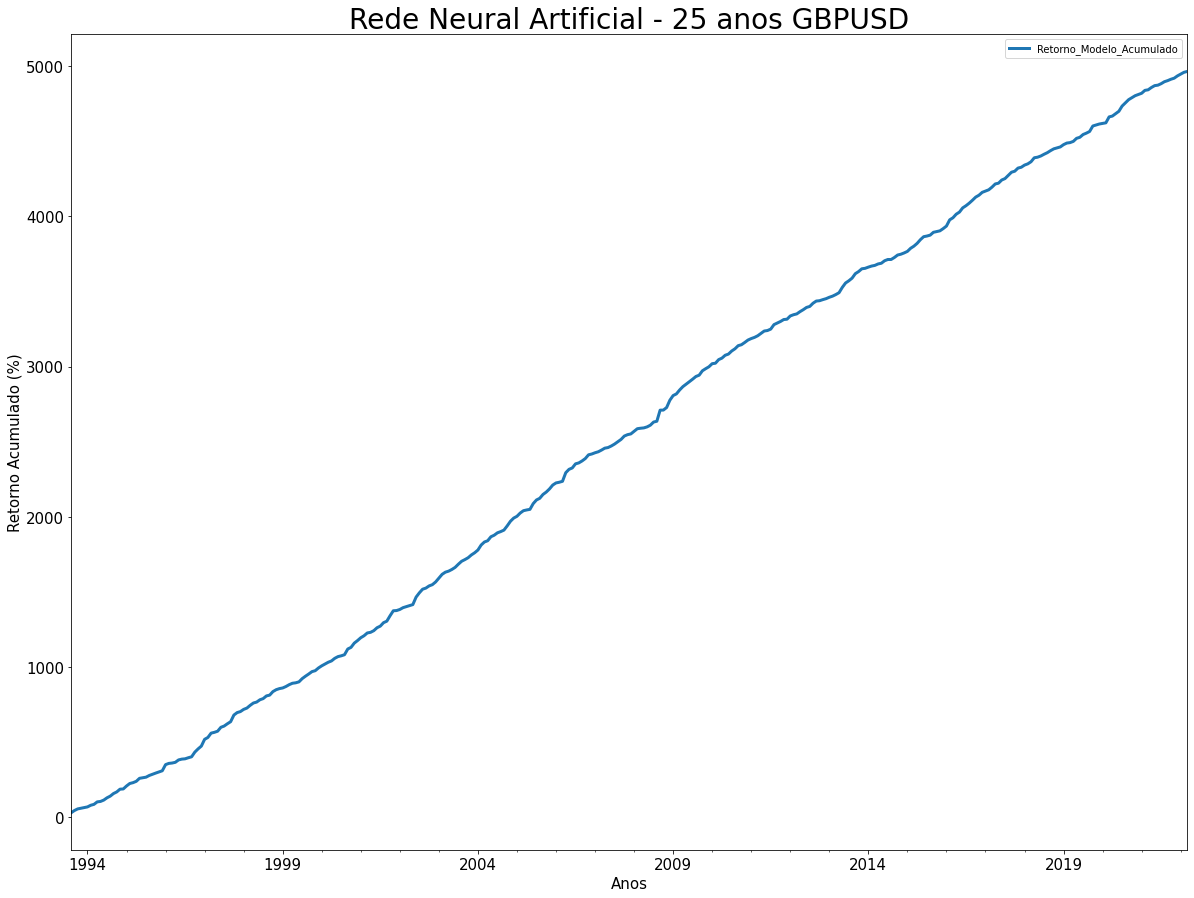

In [41]:
base_agregada["Retorno_Modelo_Acumulado"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
plt.xlabel("Anos"
           , fontsize = 15);
plt.ylabel("Retorno Acumulado (%)"
           , fontsize = 15);
plt.title("Rede Neural Artificial - 25 anos GBPUSD", fontsize = 28)
plt.legend()
plt.show()

In [42]:
df1_filtrado

,Date,hora,open,high,low,close,volume,Lag_P2,High_Low,Retorno,...,STOC,ATR14,ADX,EMA,ICK,MACD,Previsto,Retorno_Modelo,Retorno_Modelo_Acumulado,train_test
0,1993-08-10,00:00,1.49080,1.49180,1.46500,1.46680,2961,1.48980,0,-0.015438,...,3.441683,0.017098,0.000000,1.489947,1.490375,-0.003652,1,0.021612,0.021612,-1
1,1993-08-11,00:00,1.46680,1.47950,1.46680,1.47250,1971,1.49600,0,-0.015709,...,15.625000,0.016784,0.000000,1.486458,1.490375,-0.004903,1,0.006452,0.028063,-1
2,1993-08-12,00:00,1.47150,1.47820,1.45640,1.46500,3711,1.48000,0,-0.010135,...,16.195857,0.017142,18.333982,1.482166,1.486075,-0.006426,1,0.030034,0.058097,-1
3,1993-08-13,00:00,1.46500,1.47050,1.45500,1.45900,2501,1.48150,0,-0.015187,...,7.339450,0.017025,20.033632,1.477533,1.485375,-0.008024,1,0.030158,0.088255,-1
4,1993-08-16,00:00,1.46000,1.49400,1.45950,1.49100,3801,1.50130,0,-0.006861,...,66.055046,0.018309,19.484367,1.480226,1.484375,-0.006632,1,0.001811,0.090066,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,2022-03-18,00:00,1.31475,1.31966,1.31106,1.31762,87547,1.32232,0,-0.003554,...,40.306356,0.010230,36.172213,1.314322,1.321325,-0.010434,1,-0.000000,49.637362,1
7370,2022-03-21,00:00,1.31704,1.32097,1.31263,1.31683,80579,1.31013,1,0.005114,...,40.335329,0.010095,35.001164,1.314823,1.321325,-0.009645,1,-0.000000,49.637362,1
7371,2022-03-22,00:00,1.31693,1.32733,1.31197,1.32618,91282,1.30967,1,0.012606,...,62.730539,0.010471,32.925964,1.317095,1.322887,-0.008171,1,-0.000000,49.637362,1
7372,2022-03-23,00:00,1.32630,1.32984,1.31744,1.32032,74872,1.31777,1,0.001935,...,57.592068,0.010609,30.645008,1.317740,1.323515,-0.007391,-1,0.010043,49.647405,1


In [43]:
# Tipo de tabela dinamica
summary = df1_filtrado.copy()
summary["Date"] = pd.to_datetime(summary["Date"], format = "%Y-%m")

summary = summary.groupby([summary["Date"].dt.year]).agg({"Retorno_Modelo": sum}) # agg = agregando

summary.index = summary.index.set_names(["Ano"])

summary*100

,Retorno_Modelo
Ano,
1993,64.260728
1994,123.694758
1995,121.158986
1996,164.279283
1997,229.791090
1998,153.029178
1999,137.472264
2000,182.390420
2001,199.819319


In [44]:
summary_mes = df1_filtrado.copy()
summary_mes["Date"] = pd.to_datetime(summary_mes["Date"], format = "%Y-%m")

summary_mes = summary_mes.groupby([summary_mes["Date"].dt.year, summary_mes["Date"].dt.month]).agg({"Retorno_Modelo": sum})

summary_mes.index = summary_mes.index.set_names(["Ano", "Mes"])

summary_mes*100

Retorno_Modelo
Ano  Mes                
1993 8         29.660784
     9         14.799101
     10        10.729182
     11         4.472693
     12         4.598968
...                  ...
2021 11         7.083492
     12        15.195034
2022 1         11.699055
     2         12.220465
     3          5.629866

[344 rows x 1 columns]

In [45]:
print("--- Joveminino: Resultado Ensemble GBPUSD de 1993 à 2022 ---")
print("")
print("Treinamento: 1993-2006")
print("Teste      : 2007-2022")
print("Sem uso de stop - custos operacionais não incluídos")
print("---------------------------------------------------")
print("")
print("Pior retorno mensal:     {} %".format(round(summary_mes["Retorno_Modelo"].min(), 3)*100))
print("Melhor retorno mensal:   {} %".format(round(summary_mes["Retorno_Modelo"].max(), 3)*100))
print("Média ganho mensal:      {} %".format(round(summary_mes["Retorno_Modelo"].mean(), 2)*100))
print("---------------------------------")
print("Pior retorno anual:      {} %".format(round(summary["Retorno_Modelo"].min(), 3)*100))
print("Melhor retorno anual:    {} %".format(round(summary["Retorno_Modelo"].max(), 3)*100))
print("Média ganho anual:       {} %".format(round(summary["Retorno_Modelo"].mean(), 2)*100))
print("---------------------------------")
print("# Anos negativos:        {}".format((summary["Retorno_Modelo"] < 0).sum()))
print("# Anos positivos:        {}".format((summary["Retorno_Modelo"] > 0).sum()))
print("---------------------------------")
print("# Meses negativos:       {}".format((summary_mes["Retorno_Modelo"] < 0).sum()))
print("# Meses positivos:       {}".format((summary_mes["Retorno_Modelo"] > 0).sum()))
print("---------------------------------")
print("# Total(simples):        {} %".format(round(summary_mes["Retorno_Modelo"].sum(), 3)*100))

--- Joveminino: Resultado Ensemble GBPUSD de 1993 à 2022 ---

Treinamento: 1993-2006
Teste      : 2007-2022
Sem uso de stop - custos operacionais não incluídos
---------------------------------------------------

Pior retorno mensal:     0.0 %
Melhor retorno mensal:   73.7 %
Média ganho mensal:      14.000000000000002 %
---------------------------------
Pior retorno anual:      29.5 %
Melhor retorno anual:    241.6 %
Média ganho anual:       166.0 %
---------------------------------
# Anos negativos:        0
# Anos positivos:        30
---------------------------------
# Meses negativos:       0
# Meses positivos:       343
---------------------------------
# Total(simples):        4965.599999999999 %


In [273]:
import pickle 

arquivo = 'gbpusd.sav'
pickle.dump(gbpusd , open(arquivo, 'wb'))

----------

### Passo 8 - Modelo na prática

In [274]:
import sqlite3
from sqlite3 import Error

In [297]:
def conexao(db):
    global conex
    try:
        conex = sqlite3.connect(db)
        print("Conexao realizada")
    except Error as e:
        print(e)

In [298]:
conexao("C:\\sqlite\\databases\\GBPUSD1.db")

Conexao realizada


In [299]:
# Carrega o modelo
import pickle
meu_modelo = pickle.load(open("gbpusd.sav", "rb"))

In [280]:
# Isto daqui é o que voce vai fazer no dia a dia

# Escreve o novo registro no banco de dados
ponteiro = conex.cursor()
ponteiro.execute("""INSERT INTO GBPUSD (data, hora, open, high,low,close,volume )
                VALUES ("08/03/2022", "00:00", "1.30763", "1.30773", "1.29819", "1.30298","0")""")
conex.commit()

In [300]:
def cria_variaveis(df):
    df1 = df
    df1["data"] = pd.to_datetime(df1["data"]).dt.normalize()
    df1 = df1.set_index("data")
    df1.reset_index(inplace=True)
    # Lag de x periodos
    periodos = 10
    # Calculo do retorno

    df1["Retorno"] = df1["close"].pct_change(periodos)
    # Lag positivo de x periodos
    df1["Lag_P5"] = df1["close"].shift(periodos)
   # Atualização das Variaveis

    # Desvio Padrao de 5 dias
    df1["std5"] = df1["Retorno"].rolling(5).std()

    # Desvio Padrao de 10 dias
    df1["std10"] = df1["Retorno"].rolling(10).std()

    # Desvio Padrao de 15 dias
    df1["std15"] = df1["Retorno"].rolling(15).std()

    # Proporçao do corpo do candle em relacao ao range do dia
    df1["prop"] = (df1["close"]-df1["open"])/(df1["high"]-df1["low"])

    # Direçao do dia atual
    df1["dir_D"] = np.where(df1['close'] > df1['open'] , '1', '0')

    # Direçao D-1
    df1["dir_D-1"] = df1["dir_D"].shift(1)

    # Direçao D-2
    df1["dir_D-2"] = df1["dir_D"].shift(2)

    # Direçao D-3
    df1["dir_D-3"] = df1["dir_D"].shift(3)

    # Media Movel de 15 dias std5
    df1["mm_std5"] = df1["std5"].rolling(15).mean()

    # Media Movel de 15 dias std5
    df1["mm_std10"] = df1["std10"].rolling(15).mean()

    # Media Movel de 15 dias std5
    df1["mm_std15"] = df1["std15"].rolling(15).mean()

    # RSL std5
    df1["RSL_std5"] = (df1["std5"]/df1["std5"].rolling(15).mean())-1

    # RSL std10
    df1["RSL_std10"] = (df1["std10"]/df1["std10"].rolling(15).mean())-1

    # RSL std15
    df1["RSL_std15"] = (df1["std15"]/df1["std15"].rolling(15).mean())-1

    # Aplicando a fisica

    p = 10 

    # Velocidade de p dias
    df1["v"] = (df1["Retorno"] - df1["Retorno"].shift(p))/p

    # Aceleraçao de p dias
    df1["a"] = (df1["v"] - df1["v"].shift(p))/p

    # Força
    # Calculando a massa
    df1["m"] = df1["Retorno"].rolling(p).sum()
    df1["f"] = df1["m"]*df1["a"]

    # Energia cinética
    df1["T"] = 0.5*df1["m"]*df1["v"]*df1["v"]


    # Trabalho 
    # cateto_oposto
    cat_op = df1["Retorno"].rolling(p).sum()-df1["Retorno"].rolling(1).sum()
    cat_ad = p
    df1["cat"] = cat_op/cat_ad
    df1 = df1.dropna(axis = 0)
    df1["w"] = df1["f"]*np.cos(np.arctan(df1["cat"]))

    # Energia potencial
    df1["k"] = cat_op*df1["m"]

    # Torque
    df1["tau"] = df1["f"]*np.sin(np.arctan(df1["cat"]))

    # Momentum
    df1["M"] = df1["m"]*df1["v"]

    # Gravidade
    df1["g"] = df1["m"]*df1["Retorno"].rolling(p).sum()/(df1["m"]/df1["Retorno"].rolling(p).sum())*(df1["m"]/df1["Retorno"].rolling(p).sum())
    
    # Para o zig zag dos retornos
    df1["Retorno1"] = df1["Retorno"].shift(1)
    df1["Retorno2"] = df1["Retorno"].shift(2)

    df1["Zigzag_alta"] = np.where(((df1["Retorno"] > 0) & (df1["Retorno1"] < 0) & (df1["Retorno2"] > 0)), 1, 0)
    df1["Zigzag_baixa"] = np.where(((df1["Retorno"] < 0) & (df1["Retorno1"] > 0) & (df1["Retorno2"] < 0)), -1, 0)
    df1["Zigzag"] = df1["Zigzag_alta"] + df1["Zigzag_baixa"]

    # Variaveis de Indicadores técnicos - Biblioteca TA

    # Inicializa o indicador
    indicator_atr14 = ta.volatility.AverageTrueRange(high = df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14)

    indicator_bb = ta.volatility.bollinger_wband(close = df1["close"], window = 20, window_dev = 2)
    indicator_rsi14 = ta.momentum.RSIIndicator(close = df1["close"], window = 14)
    indicator_rsi2 = ta.momentum.RSIIndicator(close = df1["close"], window = 2)
    indicator_stoc = ta.momentum.StochasticOscillator(high= df1["high"], low = df1["low"]
                                                  , close = df1["close"], window = 14, smooth_window = 3)
    indicator_adx = ta.trend.ADXIndicator(high = df1["high"], low= df1["low"], close = df1["close"], window= 14)
    indicator_ichimoko = ta.trend.IchimokuIndicator(high= df1["high"], low = df1["low"], window1 = 9, window2 = 26, window3= 52)
    indicator_macd  =ta.trend.MACD(close= df1["close"], window_slow = 26, window_fast = 12, window_sign = 9)
    indicator_ema = ta.trend.EMAIndicator(close = df1["close"], window= 9)
    # Variavel abertura das bandas
    df1["abertura_bb"] = indicator_bb
    df1["RSI14"] = indicator_rsi14.rsi()
    df1["RSI2"] = indicator_rsi2.rsi()
    df1["STOC"] = indicator_stoc.stoch()
    df1["ATR14"] = indicator_atr14.average_true_range()
    df1["ADX"] = indicator_adx.adx()
    df1["EMA"] = indicator_ema.ema_indicator()
    df1["ICK"] = indicator_ichimoko.ichimoku_a()
    df1["MACD"] = indicator_macd.macd()

    # Filtrando os valores missing

    df1_filtrado = df1.dropna(axis = 0) 

    df1_filtrado = df1_filtrado.drop(["mm_std5", "mm_std10", "mm_std15", "Retorno1"
                                  , "Retorno2", "Zigzag_alta", "Zigzag_baixa"
                                 ], axis = 1)

    df2 = df1_filtrado.copy()

    # Resistencia - R=V/I onde V é a amplitude maxima dos ultimos retornos
    # Novo periodo
    p = 10

    df1["V_Max"] = df1["Retorno"].rolling(p).max()
    df1["V_Min"] = df1["Retorno"].rolling(p).min()
    df1["I"] = df1["Retorno"].rolling(p).sum()
    
    corte = 5

    df1_filtrado["RSL_std5"] = pd.qcut(df1_filtrado["RSL_std5"], corte, labels = False)
    df1_filtrado["RSL_std10"] = pd.qcut(df1_filtrado["RSL_std10"], corte, labels = False)
    df1_filtrado["RSL_std15"] = pd.qcut(df1_filtrado["RSL_std15"], corte, labels = False)
    df1_filtrado["v"] = pd.qcut(df1_filtrado["v"], corte, labels = False)
    df1_filtrado["a"] = pd.qcut(df1_filtrado["a"], corte, labels = False)
    df1_filtrado["m"] = pd.qcut(df1_filtrado["m"], corte, labels = False)
    df1_filtrado["f"] = pd.qcut(df1_filtrado["f"], corte, labels = False)
    df1_filtrado["T"] = pd.qcut(df1_filtrado["T"], corte, labels = False)
    df1_filtrado["w"] = pd.qcut(df1_filtrado["w"], corte, labels = False)
    df1_filtrado["k"] = pd.qcut(df1_filtrado["k"], corte, labels = False)
    df1_filtrado["tau"] = pd.qcut(df1_filtrado["tau"], corte, labels = False)
    df1_filtrado["M"] = pd.qcut(df1_filtrado["M"], corte, labels = False)
    df1_filtrado["g"] = pd.qcut(df1_filtrado["g"], corte, labels = False)
    #df1_filtrado["V_Max"] = pd.cut(df1_filtrado["V_Max"], corte, labels = False)
    #df1_filtrado["V_Min"] = pd.cut(df1_filtrado["V_Min"], corte, labels = False)
    #df1_filtrado["I"] = pd.cut(df1_filtrado["I"], corte, labels = False)
    
    return(df1_filtrado)

In [301]:
# Recupera a tabela do SQLite

base = cria_variaveis(
    pd.read_sql(
        "select data, open, high, low, close from GBPUSD"
        , conex)
)

In [302]:
base.columns

Index(['data', 'open', 'high', 'low', 'close', 'Retorno', 'Lag_P5', 'std5',
       'std10', 'std15', 'prop', 'dir_D', 'dir_D-1', 'dir_D-2', 'dir_D-3',
       'RSL_std5', 'RSL_std10', 'RSL_std15', 'v', 'a', 'm', 'f', 'T', 'cat',
       'w', 'k', 'tau', 'M', 'g', 'Zigzag', 'abertura_bb', 'RSI14', 'RSI2',
       'STOC', 'ATR14', 'ADX', 'EMA', 'ICK', 'MACD'],
      dtype='object')

In [303]:
# Funçao para a prediçao

def predicao (tab):
    aux = meu_modelo.predict(tab.iloc[:, 4:base.shape[1]])
    aux = np.where(aux == -1, 1, 0)
    mensagem = np.where(aux[-1] == 1, "Compra", "Vende")
    return (print("Previsao para amanha: " + str(mensagem)))

In [304]:
predicao(base)

Previsao para amanha: Vende


In [294]:
conex.close()